In [1]:
#display all output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:

# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
drug_df=pd.read_csv(mouse_drug_data_to_load)
trial_df=pd.read_csv(clinical_trial_data_to_load)
drug_df.head()
trial_df.head()


# Combine the data into a single dataset
drug_trial=pd.merge(drug_df,trial_df,on="Mouse ID",how="outer")

# Display the data table for preview
drug_trial.head()
drug_trial.info()
drug_trial.describe()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 0 to 1905
Data columns (total 5 columns):
Mouse ID              1906 non-null object
Drug                  1906 non-null object
Timepoint             1906 non-null int64
Tumor Volume (mm3)    1906 non-null float64
Metastatic Sites      1906 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 89.3+ KB


,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1906.000000,1906.000000,1906.000000
mean,19.538300,50.468120,1.018363
std,14.064786,8.869571,1.135991
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.991921,1.000000
75%,30.000000,56.288484,2.000000
max,45.000000,78.567014,4.000000


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
DrugTime_grouped=drug_trial.groupby(["Drug","Timepoint"])
Tumorv_mean=DrugTime_grouped["Tumor Volume (mm3)"].mean()
Tumorv_mean
# Convert to DataFrame
Tumorv_mean_df=pd.DataFrame(Tumorv_mean).reset_index()

# Preview DataFrame
Tumorv_mean_df

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
                          ...    
Zoniferol  25           55.432935
           30           57.713531
           35           60.089372
           40           62.916692
           45           65.960888
Name: Tumor Volume (mm3), Length: 100, dtype: float64

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
Tumorv_se=DrugTime_grouped["Tumor Volume (mm3)"].sem()
Tumorv_se
# Convert to DataFrame
Tumorv_se_df=pd.DataFrame(Tumorv_se).reset_index()
# Preview DataFrame
Tumorv_se_df


Drug       Timepoint
Capomulin  0            0.000000
           5            0.448593
           10           0.702684
           15           0.838617
           20           0.909731
                          ...   
Zoniferol  25           0.602513
           30           0.800043
           35           0.881426
           40           0.998515
           45           1.003576
Name: Tumor Volume (mm3), Length: 100, dtype: float64

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [5]:
# Minor Data Munging to Re-Format the Data Frames
Tumorv_mean_df_pivot=pd.pivot_table(Tumorv_mean_df,index="Timepoint",values="Tumor Volume (mm3)", columns=["Drug"])
Tumorv_se_df_pivot=pd.pivot_table(Tumorv_se_df,index="Timepoint",values="Tumor Volume (mm3)", columns=["Drug"])
# Preview that Reformatting worked
Tumorv_mean_df_pivot.head()
Tumorv_se_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [6]:
# Drop the drugs those are not needed based on the treatment plot
cleaned_tumorv_mean_pivot = Tumorv_mean_df_pivot.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], 
                                                         axis=1)
cleaned_tumorv_mean_pivot
cleaned_tumorv_se_pivot = Tumorv_se_df_pivot.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], 
                                                         axis=1)
cleaned_tumorv_se_pivot


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


(33, 73)

(-2, 48)

Text(0.5, 1.0, 'Tumor Response to Treatment')

Text(0.5, 0, 'Time (Days)')

Text(0, 0.5, 'Tumor Volume (mm3)')

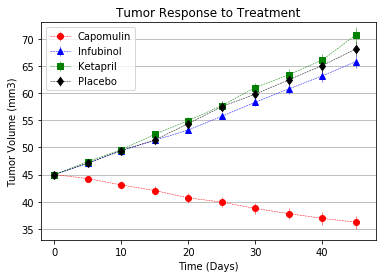

In [7]:
# Set up the x_axis,y_axis data and standard error for the plot
x_axis = cleaned_tumorv_mean_pivot.index.values
# Setting up the plot for Capomulin
se = cleaned_tumorv_se_pivot["Capomulin"]
capo = plt.errorbar(x_axis, cleaned_tumorv_mean_pivot["Capomulin"], color='red',yerr=se, fmt="o", ls="dashed", linewidth=0.5, alpha=1)
# Setting up the plot for Infubinol
se = cleaned_tumorv_se_pivot["Infubinol"]
infu = plt.errorbar(x_axis, cleaned_tumorv_mean_pivot["Infubinol"],color='blue', yerr=se, fmt="^", ls="dashed",linewidth=0.5, alpha=1)
# Setting up the plot for Ketapril
se = cleaned_tumorv_se_pivot["Ketapril"]
keta = plt.errorbar(x_axis, cleaned_tumorv_mean_pivot["Ketapril"],color='green', yerr=se, fmt="s", ls="dashed",linewidth=0.5,  alpha=1)
# Setting up the plot for Ketapril
se = cleaned_tumorv_se_pivot["Placebo"]
place = plt.errorbar(x_axis, cleaned_tumorv_mean_pivot["Placebo"],color='black', yerr=se, fmt="d", ls="dashed",linewidth=0.5,  alpha=1)
# Set up the x_axis and y_axis limits
plt.ylim(33,73)
plt.xlim(-2, 48)
# Set up the title,x_axis and y_axis labels
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
# Set up the grid for y axis
plt.grid(axis='y')
# Set up the legend
plt.legend((capo, infu, keta, place), ("Capomulin", "Infubinol", "Ketapril", "Placebo"),loc="upper left")
# Save the Figure
plt.savefig("Images/treatment.png")
# Display the plot
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
ms_mean=DrugTime_grouped["Metastatic Sites"].mean()
ms_mean

# Convert to DataFrame
ms_mean_df=pd.DataFrame(ms_mean).reset_index()
# Preview DataFrame
ms_mean_df.head()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.160000
           10           0.320000
           15           0.375000
           20           0.652174
                          ...   
Zoniferol  25           1.687500
           30           1.933333
           35           2.285714
           40           2.785714
           45           3.071429
Name: Metastatic Sites, Length: 100, dtype: float64

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
ms_se=DrugTime_grouped["Metastatic Sites"].sem()
ms_se
# Convert to DataFrame
ms_se_df=pd.DataFrame(ms_se).reset_index()
# Preview DataFrame
ms_se_df.head()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.074833
           10           0.125433
           15           0.132048
           20           0.161621
                          ...   
Zoniferol  25           0.236621
           30           0.248168
           35           0.285714
           40           0.299791
           45           0.286400
Name: Metastatic Sites, Length: 100, dtype: float64

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
# Minor Data Munging to Re-Format the Data Frames
ms_mean_df_pivot=pd.pivot_table(ms_mean_df,index="Timepoint",values="Metastatic Sites", columns=["Drug"])
ms_se_df_pivot=pd.pivot_table(ms_se_df,index="Timepoint",values="Metastatic Sites", columns=["Drug"])
# Preview that Reformatting worked
ms_mean_df_pivot.head()
ms_se_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [11]:
# Drop the drugs those are not needed based on the treatment plot
cleaned_ms_mean_pivot = ms_mean_df_pivot.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], 
                                                         axis=1)
cleaned_ms_mean_pivot
cleaned_ms_se_pivot = ms_se_df_pivot.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], 
                                                         axis=1)
cleaned_ms_se_pivot

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


(-0.2, 3.8)

(-2, 48)

Text(0.5, 1.0, 'Metastatic Spread Druing Treatment')

Text(0.5, 0, 'Time Duration (Days)')

Text(0, 0.5, 'Met. Sites')

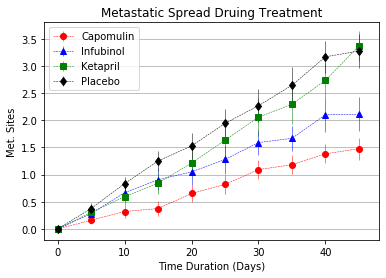

In [12]:
# Set up the x_axis,y_axis data and standard error for the plot
x_axis = cleaned_ms_mean_pivot.index.values
# Generate the Plot (with Error Bars)
# Setting up the plot for Capomulin
se = cleaned_ms_se_pivot["Capomulin"]
capo = plt.errorbar(x_axis, cleaned_ms_mean_pivot["Capomulin"], color='red',yerr=se, fmt="o", ls="dashed", linewidth=0.5, alpha=1)
# Setting up the plot for Infubinol
se = cleaned_ms_se_pivot["Infubinol"]
infu = plt.errorbar(x_axis, cleaned_ms_mean_pivot["Infubinol"],color='blue', yerr=se, fmt="^", ls="dashed",linewidth=0.5, alpha=1)
# Setting up the plot for Ketapril
se = cleaned_ms_se_pivot["Ketapril"]
keta = plt.errorbar(x_axis, cleaned_ms_mean_pivot["Ketapril"],color='green', yerr=se, fmt="s", ls="dashed",linewidth=0.5,  alpha=1)
# Setting up the plot for Ketapril
se = cleaned_ms_se_pivot["Placebo"]
place = plt.errorbar(x_axis, cleaned_ms_mean_pivot["Placebo"],color='black', yerr=se, fmt="d", ls="dashed",linewidth=0.5,  alpha=1)
# Set up the x_axis and y_axis limits
plt.ylim(-0.2,3.8)
plt.xlim(-2, 48)
# Set up the title,x_axis and y_axis labels
plt.title("Metastatic Spread Druing Treatment")
plt.xlabel("Time Duration (Days)")
plt.ylabel("Met. Sites")
# Set up the grid for y axis
plt.grid(axis='y')
# Set up the legend
plt.legend((capo, infu, keta, place), ("Capomulin", "Infubinol", "Ketapril", "Placebo"),loc="upper left")
# Save the Figure
plt.savefig("Images/spread.png")
# Show the Figure
plt.show()

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count=DrugTime_grouped["Mouse ID"].count()
# Convert to DataFrame
mice_count_df=pd.DataFrame(mice_count).reset_index()
mice_count_df=mice_count_df.rename(columns={"Mouse ID":"Mouse Count"})
# Preview DataFrame
mice_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_df_pivot=pd.pivot_table(mice_count_df,index="Timepoint",values="Mouse Count", columns=["Drug"])

# Preview that Reformatting worked
mice_count_df_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [15]:
# Drop the drugs those are not needed based on the treatment plot
cleaned_mice_count_df_pivot = mice_count_df_pivot.drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], 
                                                         axis=1)
cleaned_mice_count_df_pivot


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


(32, 102)

(-2, 48)

Text(0.5, 1.0, 'Survival During Treatment')

Text(0.5, 0, 'Time (Days)')

Text(0, 0.5, 'Survival Rate(%)')

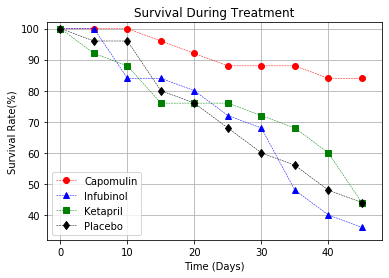

In [16]:
# Set up the x_axis,y_axis data and standard error for the plot
x_axis = cleaned_mice_count_df_pivot.index.values
# Generate the Plot (with Error Bars)
# Setting up the plot for Capomulin
capo = plt.errorbar(x_axis, cleaned_mice_count_df_pivot["Capomulin"]/25*100, color='red',fmt="o", ls="dashed", linewidth=0.5, alpha=1)
# Setting up the plot for Infubinol
infu = plt.errorbar(x_axis, cleaned_mice_count_df_pivot["Infubinol"]/25*100,color='blue', fmt="^", ls="dashed",linewidth=0.5, alpha=1)
# Setting up the plot for Ketapril
keta = plt.errorbar(x_axis, cleaned_mice_count_df_pivot["Ketapril"]/25*100,color='green', fmt="s", ls="dashed",linewidth=0.5,  alpha=1)
# Setting up the plot for Ketapril
place = plt.errorbar(x_axis, cleaned_mice_count_df_pivot["Placebo"]/25*100,color='black', fmt="d", ls="dashed",linewidth=0.5,  alpha=1)
# Set up the x_axis and y_axis limits
plt.ylim(32,102)
plt.xlim(-2, 48)
# Set up the title,x_axis and y_axis labels
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate(%)")
# Set up the grid for y axis
plt.grid(axis='both')
# Set up the legend
plt.legend((capo, infu, keta, place), ("Capomulin", "Infubinol", "Ketapril", "Placebo"),loc="best")
# Save the Figure
plt.savefig("Images/survival.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
capo_change = ((Tumorv_mean_df_pivot["Capomulin"][45] - Tumorv_mean_df_pivot["Capomulin"][0])/45)*100
infu_change = ((Tumorv_mean_df_pivot["Infubinol"][45] - Tumorv_mean_df_pivot["Infubinol"][0])/45)*100
keta_change = ((Tumorv_mean_df_pivot["Ketapril"][45] - Tumorv_mean_df_pivot["Ketapril"][0])/45)*100
place_change = ((Tumorv_mean_df_pivot["Placebo"][45] - Tumorv_mean_df_pivot["Placebo"][0])/45)*100


In [18]:
# Calculate the percent changes for each drug and convert to DataFrame
pct_change=((Tumorv_mean_df_pivot.iloc[9,:]-Tumorv_mean_df_pivot.iloc[0,:])*100/Tumorv_mean_df_pivot.iloc[0,:])
# Display the data to confirm
pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [19]:
# Drop the drugs those are not needed based on the treatment plot by using cleaned datasets
pct_change=((cleaned_tumorv_mean_pivot.iloc[9,:]-cleaned_tumorv_mean_pivot.iloc[0,:])*100/cleaned_tumorv_mean_pivot.iloc[0,:])
pct_change

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

tuple

Text(0.5, 1.0, 'Tumor Change Over 45 Day Treatment')

[Text(0, 0, 'Capomulin'),
 Text(0, 0, 'Infubinol'),
 Text(0, 0, 'Ketapril'),
 Text(0, 0, 'Placebo')]

Text(0, 0.5, '% Tumor Volume Change')

(-28, 68)

Text(0.0, -10, '-19% ')

Text(1.0, 5, '46%')

Text(2.0, 5, '57%')

Text(3.0, 5, '51%')

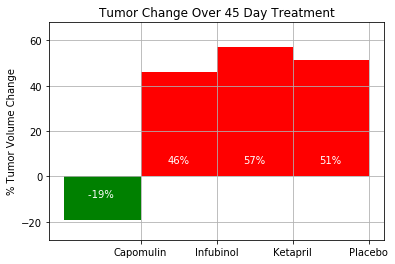

In [22]:
# Store all Relevant Percent Changes into a Tuple
pct_change_tuple = (pct_change["Capomulin"],
               pct_change["Infubinol"],
               pct_change["Ketapril"],
               pct_change["Placebo"])
type(pct_change_tuple)
# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
x_label = np.arange(len(pct_change_tuple))
width = 1
pass_drug = ax.bar(x_label[0], pct_change[0], width, color='green')
fail_drug = ax.bar(x_label[1:], pct_change[1:], width, color='red')


# Orient widths. Add labels, tick marks, etc. 

ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(x_label + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_ylabel('% Tumor Volume Change')
ax.set_ylim([-28,68])
ax.grid(axis="both")
# Set up text label for bars in pass_drug
for bar in pass_drug:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., -10,'%d%% ' % int(height),ha='center', va='bottom', color="white")
# Set up text label for bar in fail_drug
for bar in fail_drug:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., 5,'%d%%' % int(height),ha='center', va='bottom', color="white")
# Save the Figure
fig.savefig("Images/change.png")

# Show the Figure
fig.show()

tuple

Text(0.5, 1.0, 'Tumor Change Over 45 Day Treatment')

[Text(0, 0, 'Capomulin'),
 Text(0, 0, 'Infubinol'),
 Text(0, 0, 'Ketapril'),
 Text(0, 0, 'Placebo')]

Text(0, 0.5, '% Tumor Volume Change')

(-28, 68)

Text(0.0, -10, '-19% ')

Text(1.0, 5, '46%')

Text(2.0, 5, '57%')

Text(3.0, 5, '51%')

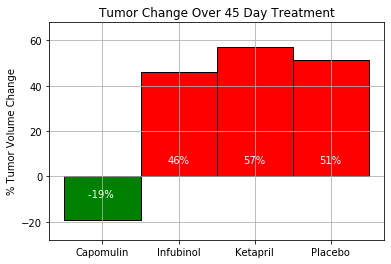

In [24]:
# Store all Relevant Percent Changes into a Tuple
pct_change_tuple = (pct_change["Capomulin"],
               pct_change["Infubinol"],
               pct_change["Ketapril"],
               pct_change["Placebo"])
type(pct_change_tuple)
# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
x_label = np.arange(len(pct_change_tuple))
width = 1
pass_drug = ax.bar(x_label[0], pct_change[0], width, color='green',edgecolor="black")
fail_drug = ax.bar(x_label[1:], pct_change[1:], width, color='red',edgecolor="black")


# Orient widths. Add labels, tick marks, etc. 

ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(x_label)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_ylabel('% Tumor Volume Change')
ax.set_ylim([-28,68])
ax.grid(axis="both")
# Set up text label for bars in pass_drug
for bar in pass_drug:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., -10,'%d%% ' % int(height),ha='center', va='bottom', color="white")
# Set up text label for bar in fail_drug
for bar in fail_drug:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., 5,'%d%%' % int(height),ha='center', va='bottom', color="white")
# Save the Figure
fig.savefig("Images/change2.png")

# Show the Figure
fig.show()